<h1>Group 37 Project Report: An Empirical Analysis of Pulsar Signalling <h1>

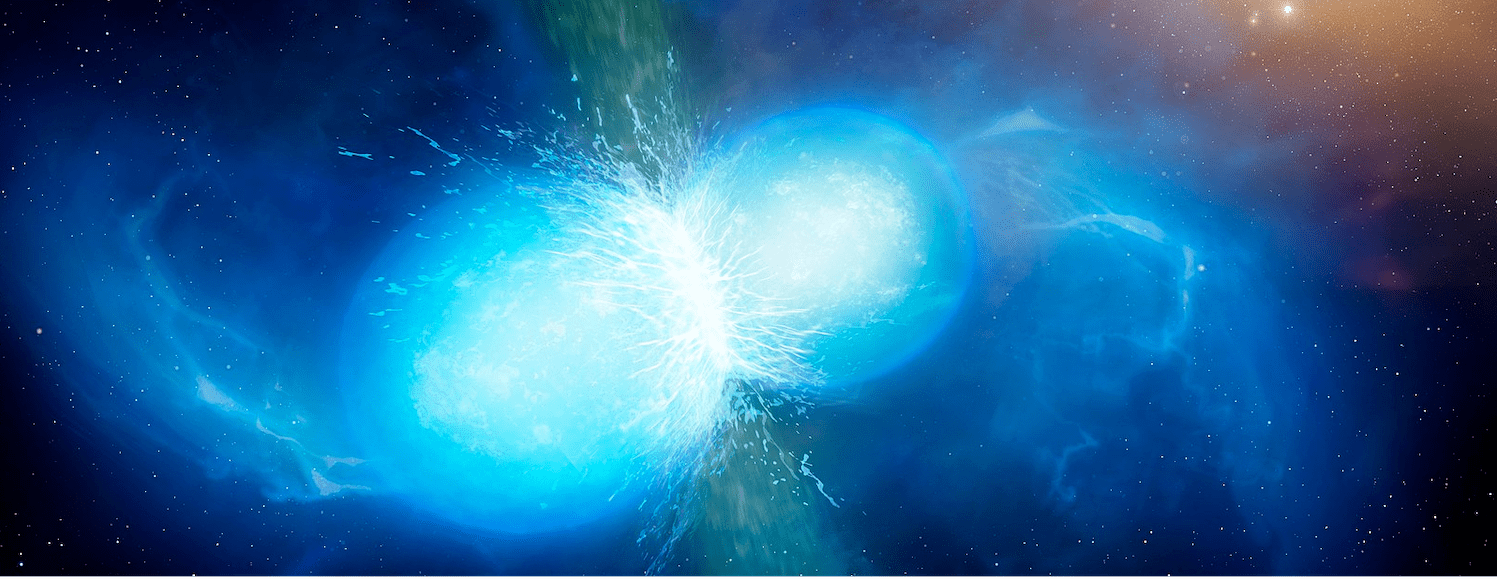

<font size="2"> <i>image attribution</i>: University of Warwick/Mark Garlick, CC BY 4.0 <https://creativecommons.org/licenses/by/4.0>, via Wikimedia Commons </font>

<h3>Introduction</h3>
<hr>

*Total Word Count: 1316*

Pulsars are a rare type of neutron star that rotates while emitting electromagnetic radiation. When directed at the earth, these  emissions can be picked up by radio telescopes, producing radio waves of recognizable frequencies.
Unfortunately, however, these frequencies are difficult to separate from terrestrial radio interference, making it difficult for astronomers to detect veritable pulsars. <br>

To investigate this phenomenon statistically, our group posed the question: **"How accurate is KNN classification at differentiating pulsar emissions from interference?"** using a K-nearest neighbors (KNN) algorithm to differentiate pulsar from terrestrial emissions. <br>

This was done using the *HTRU2 Dataset* collected by Dr. Robert Lyon. <br>
This data frame has nine columns, including eight quantitative columns and one class column. The column names are shown below (Machine Learning Repository, n.d.): <br>

<ol>
  <li>Mean of the integrated profile</li>
  <li>Standard deviation of the integrated profile</li>
  <li>Excess kurtosis of the integrated profile</li>
  <li>Skewness of the integrated profile</li>
  <li>Mean of the DM-SNR curve</li>
  <li>Standard deviation of the DM-SNR curve</li>
  <li>Excess kurtosis of the DM-SNR curve</li>
  <li>Skewness of the DM-SNR curve</li>
  <li>Class</li>
</ol>

<h3>Methods and Results<h3>
<hr>

First, we perform some bookkeeping - importing the necessary packages, before setting a *seed* of 3333 for reproducibility. <br>


In [2]:
#warn is set to -1 here to remove warning messages from the proposal and improve readability
options(warn=-1)
options(repr.matrix.max.rows = 6, repr.matrix.max.cols = 10)
library(tidyverse)
library(tidymodels)
set.seed(3333)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::

Next, we download the HTRU2 zip file from the dataset URL using *download.file()*, unzip using the *unz()* function, before loading our data frame with *read_csv()*. Column names have been abbreviated as follows to improve readability: <br /> 
<ol>
  <li>Integrated Profile &rarr; IP</li>
  <li>Standard Deviation &rarr; sd</li>
  <li>DM-SNR curve &rarr; DM-SNR</li>
</ol>

In [3]:
HTRU2_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

download.file(HTRU2_url, destfile = "HTRU_2.zip") 

#Unz used here as the downloaded file in question is not a raw csv file - but a .zip file with a csv file inside
HTRU_df <- unz("HTRU_2.zip", "HTRU_2.csv") %>% 
    read_csv(col_names = c("IP mean",
                           "IP sd",
                           "IP excess kurtosis",
                           "IP skewness",
                           "DM-SNR mean",
                           "DM-SNR sd",
                           "DM-SNR excess kurtosis",
                           "DM-SNR skewness",
                           "Class"))

Parsed with column specification:
cols(
  `IP mean` = col_double(),
  `IP sd` = col_double(),
  `IP excess kurtosis` = col_double(),
  `IP skewness` = col_double(),
  `DM-SNR mean` = col_double(),
  `DM-SNR sd` = col_double(),
  `DM-SNR excess kurtosis` = col_double(),
  `DM-SNR skewness` = col_double(),
  Class = col_double()
)



Although this dataset is already **tidy**,  three wrangling improvements are made:
<ol>
  <li>Spaces are removed from column names </li>
  <li>Class values (0 and 1) are replaced by "<b>Pulsar Star</b>" and "<b>Interference</b>" (as defined by metadata) </li>
  <li>The class column is converted to a factor datatype </li>
</ol>

In [4]:
#The make.names() function is used here to enter column names into a wrangleable format
colnames(HTRU_df) <- make.names(colnames(HTRU_df))

#the ifelse() function is used here to read the 0 or 1 class values, then exchange with "Pulsar Star" or "Interference" characters respectively
pulsar_df <- HTRU_df %>%
    mutate(Class = as.factor(ifelse(Class == 1, "Pulsar Star", "Interference")))


<h4><b>Table 1</b> - Aggregated Pulsar and Interference Data<h4>
<hr>

In [18]:
pulsar_df

IP.mean,IP.sd,IP.excess.kurtosis,IP.skewness,DM.SNR.mean,DM.SNR.sd,DM.SNR.excess.kurtosis,DM.SNR.skewness,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.5625,55.68378,-0.2345714,-0.6996484,3.199833,19.11043,7.975532,74.24222,Interference
102.5078,58.88243,0.4653182,-0.5150879,1.677258,14.86015,10.576487,127.39358,Interference
103.0156,39.34165,0.3233284,1.0511644,3.121237,21.74467,7.735822,63.17191,Interference
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
119.3359,59.93594,0.1593631,-0.74302540,21.430602,58.87200,2.499517,4.595173,Interference
114.5078,53.90240,0.2011614,-0.02478884,1.946488,13.38173,10.007967,134.238910,Interference
57.0625,85.79734,1.4063910,0.08951971,188.306020,64.71256,-1.597527,1.429475,Interference


---
We then split our data into training (75%) and testing (25%) datasets using the *initial_split()* function.

In [6]:
pulsar_split <- initial_split(pulsar_df, prop = 0.75, strata = Class) 
pulsar_training <- training(pulsar_split)
pulsar_testing <- testing(pulsar_split)

Before training our algorithm, we need to first perform some preliminary data analysis to determine the **class frequencies**, **mean predictor values**, and which columns will be used as predictors through **forward selection**.

**Number of Observations Per Class**

In [7]:
n_obs_df <- pulsar_training %>%
    group_by(Class) %>%
    summarize(Class.Frequency = n())

total_n <- n_obs_df %>%
    select(Class.Frequency) %>%
    colSums()

#The round function is used here to round her frequency to a whole number
frequency_df <- mutate(n_obs_df, Percent.Class.Frequency = round((Class.Frequency/total_n)*100, digits = 0))

`summarise()` ungrouping output (override with `.groups` argument)



<h4><b>Table 2</b> - Pulsar and Interference Frequency<h4>
<hr>

In [8]:
frequency_df

Class,Class.Frequency,Percent.Class.Frequency
<fct>,<int>,<dbl>
Interference,12183,91
Pulsar Star,1241,9


---
As can be seen in the table above, there is a large discrepancy between the number of **interference** values (91%) and the number of **pulsar star** values (9%). <br> As K nearest neighbors classification performs poorly under class imbalance, *upsampling* will thus be performed using the **themis** package - duplicating pulsar star observations to increase the 'weight' they hold to affect the classification of new observations

**Mean Predictor Values**

In [9]:
mean_df <- pulsar_training %>%
    select(-Class) %>%
    map_df(mean, na.rm  = TRUE)

<h4><b>Table 3</b> - Pulsar and Interference Mean Predictor Values<h4>
<hr>

In [10]:
mean_df

IP.mean,IP.sd,IP.excess.kurtosis,IP.skewness,DM.SNR.mean,DM.SNR.sd,DM.SNR.excess.kurtosis,DM.SNR.skewness
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
110.8804,46.47313,0.4866102,1.822736,12.67116,26.32348,8.328325,105.6463


---
Considering the breadth in values across all variables, we'll need to *standardize* each to improve classification - setting the mean to 0 and standard deviation to 1 when creating our recipe. Additionally, as this dataset has been reviewed by human annotators, there are no missing values.

 With that out of the way, let's perform our forward selection.

**Forward Selection**

In order to determine which variables maximize classification accuracy, forward selection is used to iteratively build a model by adding one predictor variable at a time - recording the accuracy at each step of the process (Campell et al., 2021). 

This process involves the following steps: <br>
1. Create a blank candidate model with no predictors <br>
    1. Use *paste()* to generate model formulas that add one unused predictors to our candidate models <br>
    2. Cross validate all candidate models <br>
    3. Choose the model with the highest accuracy
    4. Iterate untill all predictors have been used 
2. Choose the simplest model with the highest accuracy as a basis for your model formula

In [ ]:
p_cols <- colnames(pulsar_training %>% select(-Class))

accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                set_engine("kknn") %>%
                set_mode("classification")

pulsar_vfold <- vfold_cv(pulsar_training, v = 5, strata = Class)

selected <- c()

for (i in 1:length(p_cols)) {
    
    accs <- list()
    models <- list()
    
    for (j in 1:length(p_cols)) {
        
        preds_new <- c(selected, p_cols[[j]])
        model_string <- paste("Class", "~", paste(preds_new, collapse="+"))
        
        pulsar_recipe <- recipe(as.formula(model_string), data = pulsar_training) %>%
            step_scale(all_predictors()) %>%
            step_center(all_predictors())
        
        acc <- workflow() %>%
                        add_recipe(pulsar_recipe) %>%
                        add_model(knn_spec) %>%
                        tune_grid(resamples = pulsar_vfold, grid = 10) %>%
                        collect_metrics() %>%
                        filter(.metric == "accuracy") %>%
                        summarize(mx = max(mean))
        
        acc <- acc$mx %>% unlist()
        
        accs[[j]] <- acc
        
        models[[j]] <- model_string        
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>%
                    add_row(size = i, 
                            model_string = models[[jstar]], 
                            accuracy = accs[[jstar]])
    selected <- c(selected, p_cols[[jstar]])
    p_cols <- p_cols[-jstar]    
}

<h4><b>Table 4</b> - Pulsar Forward Selection Accuracy Values<h4>
<hr>

In [11]:
options(repr.matrix.max.rows = 10, repr.matrix.max.cols = 10)
accuracies

ERROR: Error in eval(expr, envir, enclos): object 'accuracies' not found


---
From *table 4*, we see that accuracy increases only for the first three predictors. By reviewing the associated model strings, we were able to decide on our choice of predictors for this investigation - choosing the following variables for their positive influence upon pulsar prediction:

<ol>
  <li><b>Excess Kurtosis of the Integrated Profile </b></li>
  <li><b>Mean of the Integrated Profile</b></li>
  <li><b>Mean of the DM-SNR curve</b></li>
</ol>

Our training and testing data is constricted below to reflect these findings:

In [12]:
pulsar_training <- select(pulsar_training, "IP.mean",
                                           "IP.excess.kurtosis",
                                           "DM.SNR.mean",
                                           "Class")
pulsar_testing <- select(pulsar_testing, "IP.mean",
                                           "IP.excess.kurtosis",
                                           "DM.SNR.mean",
                                           "Class")

<h4><b>Table 5</b> - Pulsar Forward Selected Training Data<h4>
<hr>

In [13]:
options(repr.matrix.max.rows = 6, repr.matrix.max.cols = 10)
pulsar_training

IP.mean,IP.excess.kurtosis,DM.SNR.mean,Class
<dbl>,<dbl>,<dbl>,<fct>
103.01562,0.32332837,3.121237,Interference
136.75000,-0.06841464,3.642977,Interference
88.72656,0.60086608,1.178930,Interference
⋮,⋮,⋮,⋮
122.5547,0.1279781,16.409699,Interference
119.3359,0.1593631,21.430602,Interference
114.5078,0.2011614,1.946488,Interference


---
To better understand the relationships between the three predictors and pulsar class, we perform an introductory visualization (*see Figure 1 below*) using the three predictors we decided upon during **forward selection**:

In [23]:
point1 = c(4, 150)

options(repr.plot.width = 16, repr.plot.height = 10)
pulsar_plot <- pulsar_training %>%
    ggplot(aes(x = IP.excess.kurtosis, 
               y = IP.mean, 
               colour = DM.SNR.mean,
               shape = Class)) +
        geom_point(alpha = 0.4, 
                   size = 3.4) +
        scale_shape_manual(values=c(4, 19)) +
        labs(x = "\nExcess Kurtosis of the Integrated Profile (Log Scale)\n", 
             y = "\nMean of the Integrated Profile\n", 
             color = "Mean of the\nDM SNR Curve Scale", 
             shape = "Class") +
#         ggtitle("\nIntegrated Profile Excess Kurtosis and Mean against the DM SNR Curve Mean for Incoming Radio Waves\n") +
          ggtitle("\n") +
        theme(text = element_text(size = 22),
              plot.title = element_text(size = 25, 
                                        face="bold", 
                                        hjust = 0.5))+
        scale_x_log10(limits = c(0.005, 10)) +
        ylim(c(0, 150)) +
        scale_color_gradient2(low = "orange1",
                              mid = "deepskyblue2",
                              high = "steelblue2", 
                              midpoint = 80)

<h4><b>Figure 1</b> - Integrated Profile Excess Kurtosis and Mean against the DM SNR Curve Mean for Incoming Radio Waves<h4>
<hr>

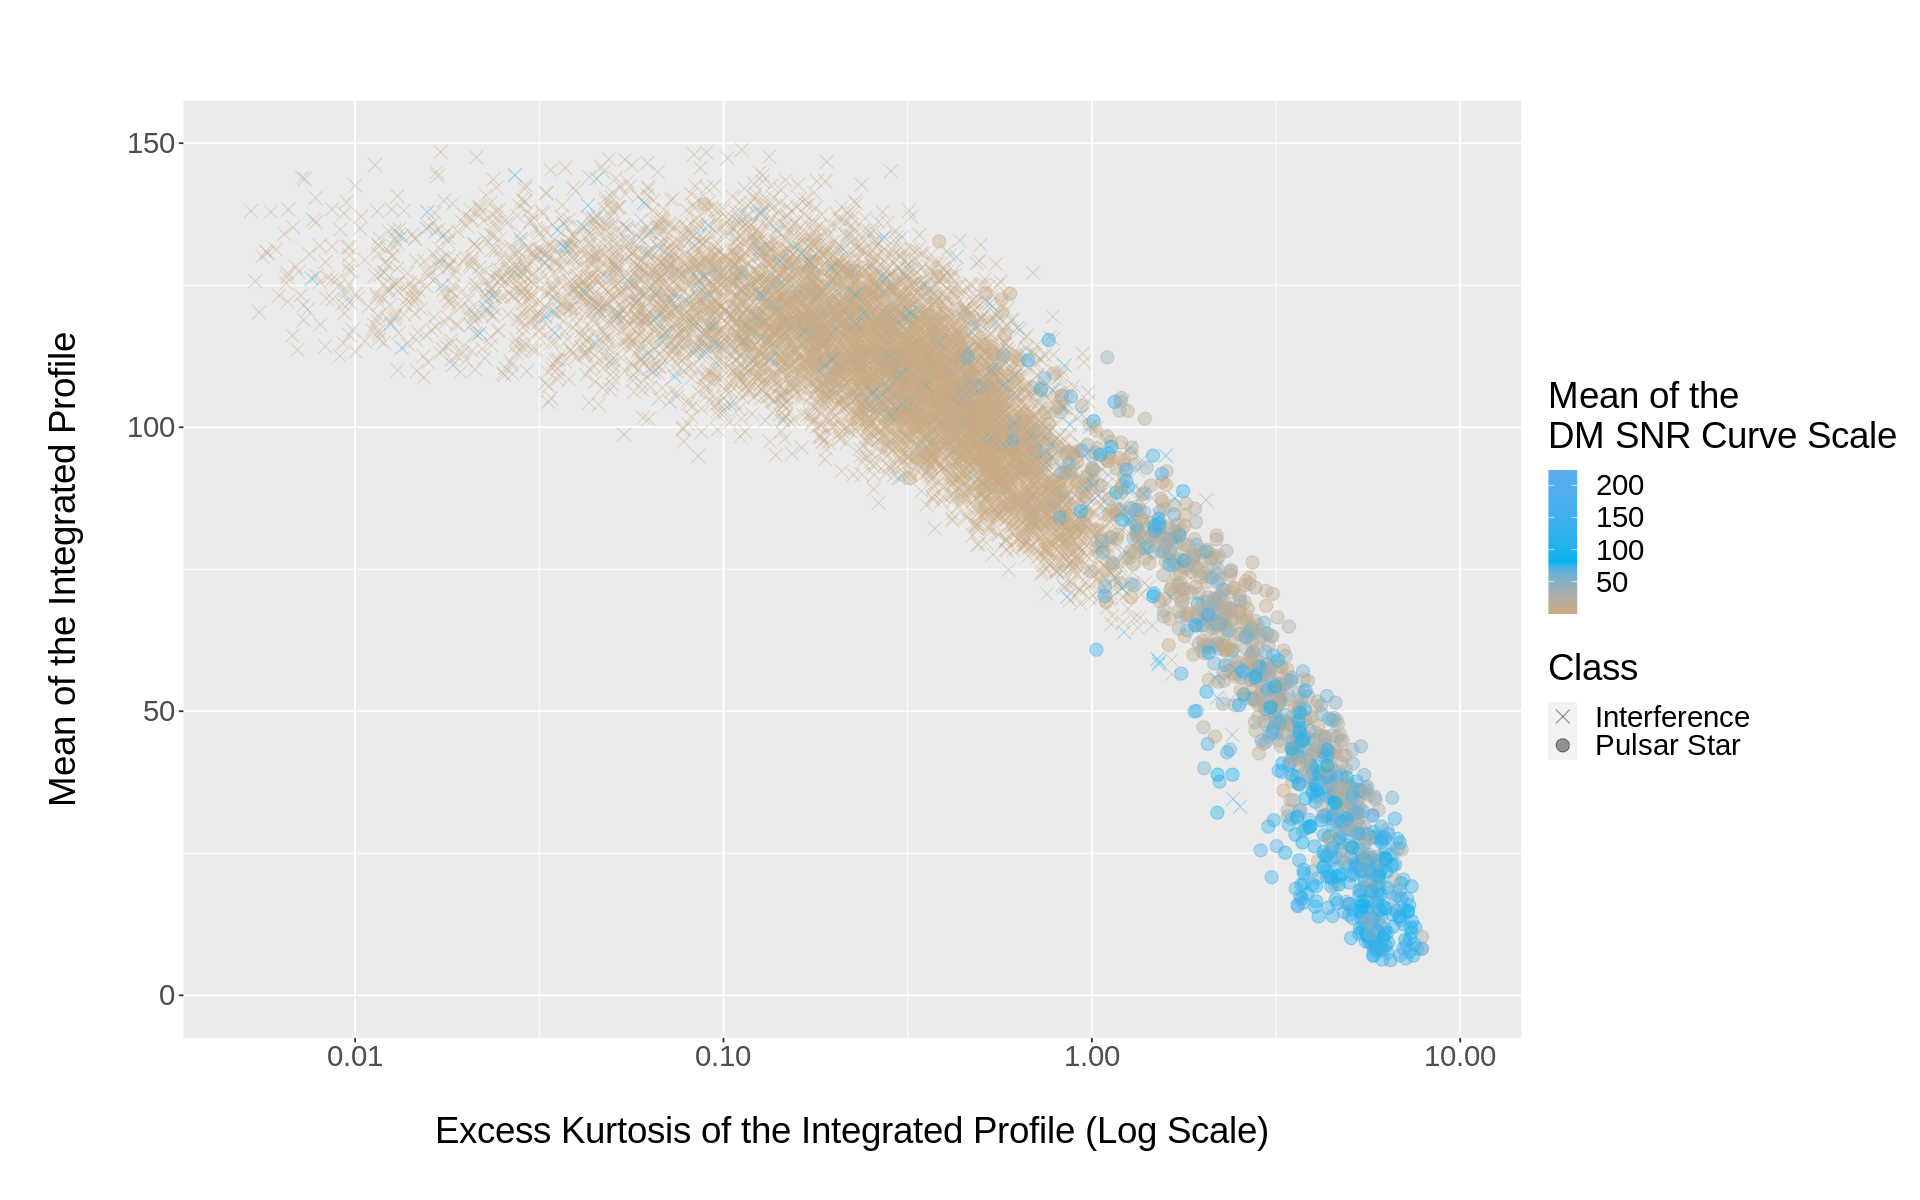

In [24]:
pulsar_plot

---
As our predictor domain-space spans 3 dimensions, we chose to model the third dimension (**Mean of the DM SNR Curve**) using colour - with low values in beige, and high values in steel blue. <br>

To then represent our **intereference** and **pulsar** classes, we opted to change point shape: representing **intereference** points with crosses, and **pulsar** points with standard circles. <br>

From the graph above, there is undoubtedly a relationship between the **pulsar** class and the three predictors we decided upon from **cross validation**. It seems in general that pulsar stars have a high **Excess Kurtosis of the Integrated Profile**, a high **Mean of the DM SNR Curve**, and a low **Mean of the Integrated Profile**. <br>

With that out of the way, it's time to create our  K-Nearest Neighbours algorithm with the selected training data:

**Recipe**

In order to offset the class imbalance present between **pulsar** readings and the more common **interference** ones (*see Table 2*), we apply the *Themis* package to upsample our data - duplicating pulsar observations to increase their effect upon classification. <br>

However, this will **not** be baked into our cross validation data during hyperparameter selection. If we were to prep and bake oversampled training data and subsequently perform cross validation, we would return a highest-accuracy K value of 1 each time. **Why?** Because of data leakage. As duplicate points from the infrequent class are spread throughout the training set, some will inevitably enter the validation set - allowing our algorithm to test on duplicate points it has already trained on. <br>
To prevent this, moderate upsampling (of ratio 0.2) will be performed directly via our recipe.

In [16]:
pulsar_recipe <- recipe(Class ~ ., data = pulsar_training) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors()) %>%
    step_upsample(Class, over_ratio = 0.2)

**Model Specification**

In [17]:
pulsar_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")

**Workflow Metrics & Cross Validation**

For our cross validation workflow, we consider 5 folds, using even k values from 2 to 50.

In [18]:
pulsar_vfold <- vfold_cv(pulsar_training, v = 5, strata = Class)
gridvals <- tibble(neighbors = seq(from = 2, to = 50, by = 2))

accuracies <- workflow() %>%
    add_model(pulsar_spec) %>%
    add_recipe(pulsar_recipe) %>%
    tune_grid(resamples = pulsar_vfold, grid = gridvals) %>%
    collect_metrics() %>%
    filter(.metric == "accuracy") %>%
    arrange(desc(mean))

best_k_value <- slice(accuracies, 1) %>%
    pull(neighbors)

<h4><b>Table 6</b> - K-Value Cross Validation Metrics From 2 to 50 Nearest Neighbors<h4>
<hr>

In [19]:
options(repr.matrix.max.rows = 5, repr.matrix.max.cols = 10)
accuracies
print(paste("Best K Value: ", as.character(best_k_value)))

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
50,accuracy,binary,0.9800357,5,0.001250157,Model25
32,accuracy,binary,0.9799612,5,0.001192074,Model16
44,accuracy,binary,0.9798867,5,0.001418631,Model22
⋮,⋮,⋮,⋮,⋮,⋮,⋮
4,accuracy,binary,0.9671484,5,0.001313751,Model02
2,accuracy,binary,0.9667014,5,0.001031392,Model01


[1] "Best K Value:  50"


---
Given our 50 neighbor algorithm performed the most accurately during **cross-validation**, we update our model specification below for 50 neighbors.

In [28]:
pulsar_upsampling <- recipe(Class ~ ., data = pulsar_training) %>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors()) %>%
    step_upsample(Class, over_ratio = 0.5)

pulsar_spec_updated <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k_value) %>%
    set_engine("kknn") %>%
    set_mode("classification")

pulsar_fit <- workflow() %>%
    add_model(pulsar_spec_updated) %>%
    add_recipe(pulsar_upsampling) %>%
    fit(data = pulsar_training)

pulsar_metrics <- pulsar_fit %>%
    predict(pulsar_testing) %>%
    bind_cols(pulsar_testing) %>%
    metrics(truth = Class, estimate = .pred_class)  

pulsar_conf <- pulsar_fit %>%
    predict(pulsar_testing) %>%
    bind_cols(pulsar_testing) %>%
    conf_mat(truth = Class, estimate = .pred_class)

pulsar_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

● step_center()
● step_scale()
● step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~best_k_value,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.04624056
Best kernel: rectangular
Best k: 50

---
With our algorithm created, we move on to our final visualization of the algorithm's classification.

To perform this, we visualize three combinations of the **Mean of Integrated Profile**, **Excess Kurtosis of Integrated Profile**, and **Mean of DM-SNR Curve** below, shaded in blue where the algorithm classifies novel pulsar observations, and in orange where the algorithm classifies interference. <br>
To improve this visualization, we additionally install the *cowplot* package, providing us with better visualiziation tools for a side-by-side comparison of our three classifier-prediction plots:

In [25]:
install.packages("cowplot", dependencies = TRUE)
library(cowplot)

also installing the dependencies ‘systemfonts’, ‘textshaping’, ‘Cairo’, ‘magick’, ‘ragg’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [24]:
options(repr.plot.width = 8, repr.plot.height = 8)

# create the grid of area/smoothness vals, and arrange in a data frame
ek_grid <- seq(min(pulsar_training$IP.excess.kurtosis), 
                max(pulsar_training$IP.excess.kurtosis), 
                length.out = 80)
ip_mean_grid <- seq(min(pulsar_training$IP.mean), 
                max(pulsar_training$IP.mean), 
                length.out = 80)
dm_mean_grid <- seq(min(pulsar_training$DM.SNR.mean), 
                max(pulsar_training$DM.SNR.mean), 
                length.out = 10)

asgrid <- as_tibble(expand.grid(IP.excess.kurtosis = ek_grid, 
                                IP.mean = ip_mean_grid, 
                                DM.SNR.mean = dm_mean_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(pulsar_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
  rename(Class = .pred_class)

pulsar_plot_1 <- ggplot() +
  geom_point(data = pulsar_training, 
             mapping = aes(x = IP.excess.kurtosis, 
                           y = IP.mean, 
                           color = Class), 
             alpha = 0.6) +
  geom_point(data = prediction_table, 
             mapping = aes(x = IP.excess.kurtosis, 
                           y = IP.mean, 
                           color = Class), 
             alpha = 0.02, 
             size = 2) +
  labs(color = "Class", 
       x = "Excess Kurtosis of the Integrated Profile", 
       y = "Mean of the Integrated Profile") +
  scale_color_manual(labels = c("Interference", "Pulsar"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 18))

# create the grid of area/smoothness vals, and arrange in a data frame
ek_grid <- seq(min(pulsar_training$IP.excess.kurtosis), 
                max(pulsar_training$IP.excess.kurtosis), 
                length.out = 80)
ip_mean_grid <- seq(min(pulsar_training$IP.mean), 
                max(pulsar_training$IP.mean), 
                length.out = 10)
dm_mean_grid <- seq(min(pulsar_training$DM.SNR.mean), 
                max(pulsar_training$DM.SNR.mean), 
                length.out = 80)

asgrid <- as_tibble(expand.grid(IP.excess.kurtosis = ek_grid, 
                                IP.mean = ip_mean_grid, 
                                DM.SNR.mean = dm_mean_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(pulsar_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
  rename(Class = .pred_class)

pulsar_plot_2 <-
  ggplot() +
  geom_point(data = pulsar_training, 
             mapping = aes(x = IP.excess.kurtosis, 
                           y = DM.SNR.mean, 
                           color = Class), 
             alpha = 0.6) +
  geom_point(data = prediction_table, 
             mapping = aes(x = IP.excess.kurtosis, 
                           y = DM.SNR.mean, 
                           color = Class), 
             alpha = 0.02, 
             size = 2) +
  labs(color = "Class", 
       x = "Excess Kurtosis of the Integrated Profile", 
       y = "Mean of the DM-SNR Curve") +
  scale_color_manual(labels = c("Interference", "Pulsar"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 18))

# create the grid of area/smoothness vals, and arrange in a data frame
ek_grid <- seq(min(pulsar_training$IP.excess.kurtosis), 
                max(pulsar_training$IP.excess.kurtosis), 
                length.out = 10)
ip_mean_grid <- seq(min(pulsar_training$IP.mean), 
                max(pulsar_training$IP.mean), 
                length.out = 80)
dm_mean_grid <- seq(min(pulsar_training$DM.SNR.mean), 
                max(pulsar_training$DM.SNR.mean), 
                length.out = 80)

asgrid <- as_tibble(expand.grid(IP.excess.kurtosis = ek_grid, 
                                IP.mean = ip_mean_grid, 
                                DM.SNR.mean = dm_mean_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(pulsar_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>%
  rename(Class = .pred_class)

pulsar_plot_3 <-
  ggplot() +
  geom_point(data = pulsar_training, 
             mapping = aes(x = DM.SNR.mean, 
                           y = IP.mean, 
                           color = Class), 
             alpha = 0.6) +
  geom_point(data = prediction_table, 
             mapping = aes(x = DM.SNR.mean, 
                           y = IP.mean, 
                           color = Class), 
             alpha = 0.02, 
             size = 2) +
  labs(color = "Class", 
       x = "Mean of the DM-SNR Curve", 
       y = "Mean of the Integrated Profile") +
  scale_color_manual(labels = c("Interference", "Pulsar"), 
                     values = c("orange2", "steelblue2")) +
  theme(text = element_text(size = 18))

<h4><b>Figure 2</b> - Trained KNN Algoirthm Classification Plots Between All Predictors  <h4>
<hr>

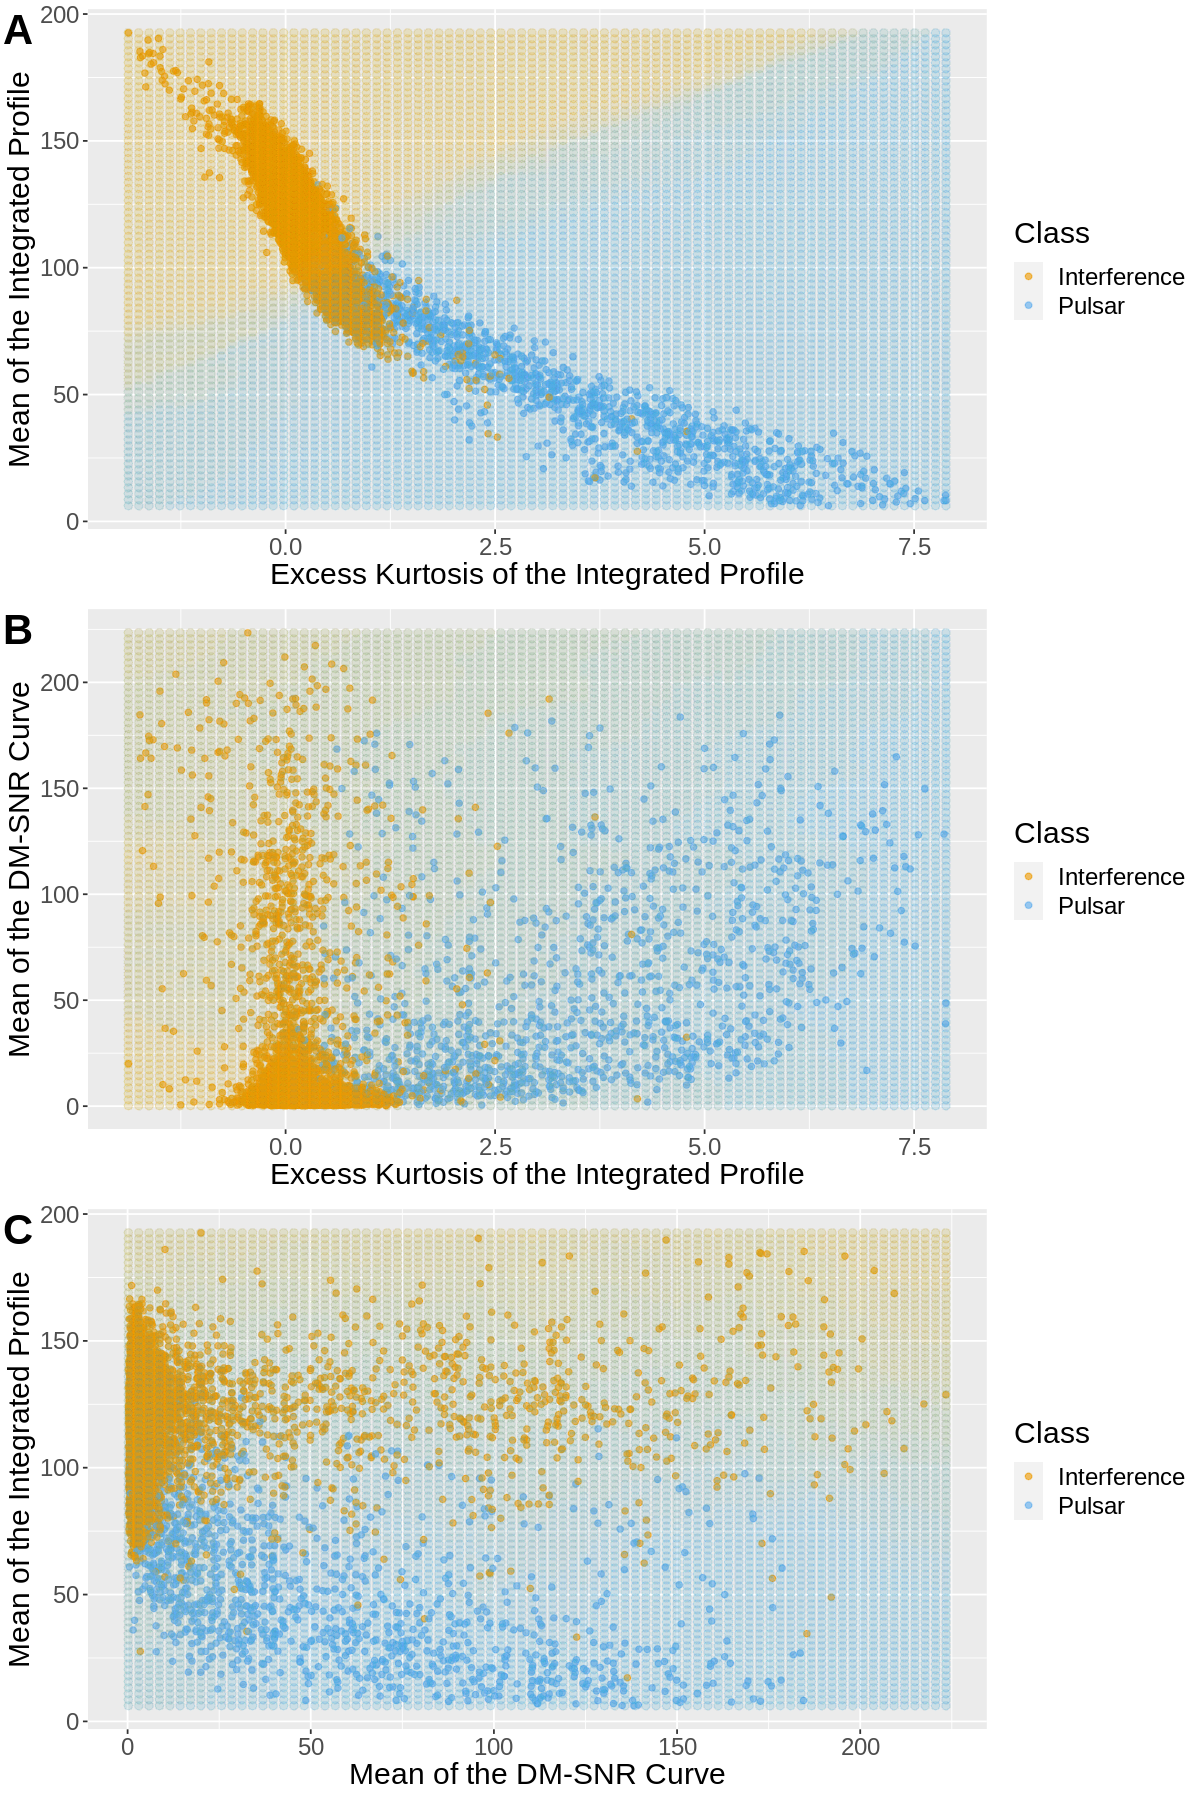

In [46]:
options(repr.plot.width = 10, repr.plot.heigh = 15)
plot_grid(pulsar_plot_1, pulsar_plot_2, pulsar_plot_3, align = "v", ncol = 1, labels = "AUTO", label_size = 25, hjust = -0.1)

<h3>Results and Discussions</h3>
<hr>

<h4><b>Table 7</b> - K-Nearest Neighbors Metrics on Testing Data<h4>

In [21]:
pulsar_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9729549
kap,binary,0.8352020


---
With that, our finalized K nearest neighbors algorithm has been created, capable of differentiating between **pulsar** and **interference** observations with an accuracy of 97.2%. Considering our data has a 91:9 ratio of interference to pulsar data (*see Table 2*) - a majority classifier here would have an accuracy of 91%. A 6.2% increase in performance is then acceptable - especially considering our classifier's proximity to 100% accuracy. <br> 

A confusion matrix has been created below to determine if any trends are present in our algorithm's misclassification. 

<h4><b>Table 8</b> - K-Nearest Neighbors Confusion Matrix on Testing Data<h4>
<hr>

In [29]:
pulsar_conf

              Truth
Prediction     Interference Pulsar Star
  Interference         4013          58
  Pulsar Star            63         340

---
From this confusion matrix, we can see that our algorithm has a distribution with slightly more *false positives* (68) than *false negatives* (56), indicating that our algorithm misclassifies more **interference** values than **pulsar** ones; perhaps due to the effects of our upsampling step, increasing the strength of pulsar observations during K-nearest neighbors classification. This property of our k-nn algorithm can be seen visually in *Figure 2* as well (*especially in plots A and B*), where a considerable number of the interference points fall under the algorithm's pulsar classification areas. With a sizeable k value of 50, this could perhaps be due to the algorithm *underfitting* training data, creating inflexible predictions that lose out on some of the training information provided. Our algorithm performed suprisingly well during cross validation (98% accuracy) to be underfit however, as underfit algorithms usually perform poorly on training data, before failing to generalize on testing data. <br>

In general, moreover, our k-nearest neighbors algorithm has produced satisfactory results that cohere with the difficulty of the problem, performing significantly above majority classification; indicating few issues with underfitting.

Additionally, using our analysis-visualizations created in *Figure 2*, it seems holistically that our algorithm judges **pulsar** readings as those with a higher **Excess Kurtosis of the Integrated Profile**, a lower **Mean of the Integrated Profile**, and a mid-ranged **Mean of the DM-SNR Curve** - results similar to the initial predictions we made when creating our preliminary data visualization (*see Figure 1*). 

Pulsar classifiers have important real-world consequences as well - pulsars are crucial in physics for studying unexplained states of matter - and two Nobel Prizes have already been granted from pulsar research. By creating such models, data-scientists take a supporting role to understand our place in the universe - learning more about what Carl Sagan (1994) would call our <i>"pale blue dot"</i> (p. 7).  
<br> <br>
Two further areas for exploration are given:
<ol>
  <li>Our classifier currently runs off of pre-processed HTRU2 data. How could this be changed to classify given raw candidate files (<i>using PulsarFeatureLab</i>)  </li>
  <li>What other forms of classification (e.g. SVMs, Logistic Regression, etc) could be applied to improve accuracy? </li>
</ol>


### 

<h3>References<h3> 

Campbell, T., Lee, M., & Timbers, T. (2021). Data Science: A First Introduction. Retrieved November 28, 2021, from https://ubc-dsci.github.io/introduction-to-datascience/classification2.html#predictor-variable-selection

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple   filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656

Machine Learning Repository. (n.d.). HTRU2 Data Set. N.p.: University College London. Retrieved November 4, 2021, from https://archive.ics.uci.edu/ml/datasets/HTRU2

Eatough, R. P., Molkenthin, N., Kramer, M., Noutsos, A., Keith, M. J., Stappers, B. W., & Lyne, A. G. (2010). Selection of radio pulsar candidates using artificial neural networks. Monthly Notices of the Royal Astronomical Society, 407(4), 2443-2450.

Sagan, C. (1994). Pale Blue Dot: A Vision of the Human Future in Space. Random House.